<a href="https://colab.research.google.com/github/crissyro/4-sem-university/blob/main/system_modeling/student_tilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [45]:
df = pd.read_csv('data.csv')

print(df.shape)
df.head()

(46, 19)


,Отметка времени,Уровень обучения,Направление,Пол,Возраст,"Оцени, насколько часто ты прокрастинируешь в учебе",Насколько прокрастинация мешает тебе учиться?,"Тревожность и стресс:\n\nЯ избегаю задач, потому что чувствую тревогу или стресс от них.","Мотивация:\n\nЯ прокрастинирую, когда не вижу смысла в задании.",Наличие дедлайна\n\nЯ работаю только когда приближается дедлайн.,Сон\n\nНедостаток сна снижает мою продуктивность и усиливает прокрастинацию.,"Социальные сети\nЯ часто откладываю дела, уходя в соцсети.",Кофеин\n\nКофе/энергетики помогают мне начать работу.,Рабочая среда\n\nМне сложно сосредоточиться в общежитии/доме/кафе и т.д.,"Самооценка\n\nЯ прокрастинирую, потому что боюсь сделать плохо.","Усталость\n\nЯ слишком устаю, чтобы начать делать задания.",Как часто ты используешь “cramming” (делаешь всё в последний момент)?,Что ты чаще откладываешь?,"Опиши одной фразой, почему ты прокрастинируешь чаще всего"
0,25.05.2025 2:00:31,Колледж,Архитектура,Женский,19,2,3,1,3,1,4,3,2,1,4,3,Иногда,Повседневные домашки,NaN
1,25.05.2025 2:05:49,Бакалаврит/Специалитет,IT,Мужской,20,3,3,4,5,3,5,5,1,2,4,1,Часто,Курсовые/доклады,"Мое окружение джипити монстры, а я в этом мире ведьмак"
2,25.05.2025 2:06:56,Бакалаврит/Специалитет,IT,Мужской,20,4,5,5,3,4,3,2,2,1,Вариант 1,3,Всегда,"Курсовые/доклады, Подготовку к экзаменам","Долгие дедлайны дают ложное чувство свободы, и я занимаюсь другими делами"
3,25.05.2025 2:07:13,Колледж,Архитектура,Женский,17,5,5,4,5,5,4,5,2,4,3,5,Часто,"Курсовые/доклады, Подготовку к экзаменам",NaN
4,25.05.2025 2:07:26,Колледж,Архитектура,Мужской,17,4,5,4,2,4,5,2,1,3,2,4,Часто,Курсовые/доклады,Отсутствие концентрации


In [46]:
self_esteem_col = 'Самооценка\n\nЯ прокрастинирую, потому что боюсь сделать плохо.'
df[self_esteem_col] = df[self_esteem_col].replace('Вариант 1', 1).astype(int)

df.at[31, 'Опиши одной фразой, почему ты прокрастинируешь чаще всего'] = 'достало'

In [47]:
column_rename = {
    'Отметка времени': 'timestamp',
    'Уровень обучения': 'education_level',
    'Направление': 'major',
    'Пол': 'gender',
    'Возраст': 'age',
    'Оцени, насколько часто ты прокрастинируешь в учебе': 'procrastination_frequency',
    'Насколько прокрастинация мешает тебе учиться?': 'procrastination_impact',
    'Тревожность и стресс:\n\nЯ избегаю задач, потому что чувствую тревогу или стресс от них.': 'anxiety_stress',
    'Мотивация:\n\nЯ прокрастинирую, когда не вижу смысла в задании.': 'motivation',
    'Наличие дедлайна\n\nЯ работаю только когда приближается дедлайн.': 'deadline_dependency',
    'Сон\n\nНедостаток сна снижает мою продуктивность и усиливает прокрастинацию.': 'sleep_impact',
    'Социальные сети\nЯ часто откладываю дела, уходя в соцсети.': 'social_media',
    'Кофеин\n\nКофе/энергетики помогают мне начать работу.': 'caffeine',
    'Рабочая среда\n\nМне сложно сосредоточиться в общежитии/доме/кафе и т.д.': 'environment',
    'Самооценка\n\nЯ прокрастинирую, потому что боюсь сделать плохо.': 'self_esteem',
    'Усталость\n\nЯ слишком устаю, чтобы начать делать задания.': 'fatigue',
    'Как часто ты используешь “cramming” (делаешь всё в последний момент)?': 'cramming_frequency',
    'Что ты чаще откладываешь? ': 'delayed_tasks',
    'Опиши одной фразой, почему ты прокрастинируешь чаще всего': 'procrastination_reason'
}

df = df.rename(columns=column_rename)

print("Обновленные названия столбцов:")
df.columns.tolist()

Обновленные названия столбцов:


['timestamp',
 'education_level',
 'major',
 'gender',
 'age',
 'procrastination_frequency',
 'procrastination_impact',
 'anxiety_stress',
 'motivation',
 'deadline_dependency',
 'sleep_impact',
 'social_media',
 'caffeine',
 'environment',
 'self_esteem',
 'fatigue',
 'cramming_frequency',
 'delayed_tasks',
 'procrastination_reason']

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  46 non-null     object
 1   education_level            46 non-null     object
 2   major                      46 non-null     object
 3   gender                     46 non-null     object
 4   age                        46 non-null     int64 
 5   procrastination_frequency  46 non-null     int64 
 6   procrastination_impact     46 non-null     int64 
 7   anxiety_stress             46 non-null     int64 
 8   motivation                 46 non-null     int64 
 9   deadline_dependency        46 non-null     int64 
 10  sleep_impact               46 non-null     int64 
 11  social_media               46 non-null     int64 
 12  caffeine                   46 non-null     int64 
 13  environment                46 non-null     int64 
 14  self_esteem 

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,46.0,19.086957,1.457945,17.0,18.00,19.0,20.0,23.0
procrastination_frequency,46.0,3.260870,1.143771,1.0,2.25,3.0,4.0,5.0
procrastination_impact,46.0,3.478261,1.260320,1.0,3.00,3.5,5.0,5.0
anxiety_stress,46.0,2.978261,1.437423,1.0,2.00,3.0,4.0,5.0
motivation,46.0,3.543478,1.328433,1.0,3.00,4.0,5.0,5.0
deadline_dependency,46.0,3.434783,1.360591,1.0,3.00,4.0,4.0,5.0
sleep_impact,46.0,3.586957,1.309386,1.0,3.00,4.0,5.0,5.0
social_media,46.0,3.413043,1.438766,1.0,2.00,3.0,5.0,5.0
caffeine,46.0,2.326087,1.549973,1.0,1.00,2.0,3.0,5.0
environment,46.0,2.717391,1.310861,1.0,1.00,3.0,4.0,5.0


In [50]:
df.describe(include='object').T

,count,unique,top,freq
timestamp,46,46,25.05.2025 2:00:31,1
education_level,46,3,Бакалаврит/Специалитет,34
major,46,5,IT,17
gender,46,2,Женский,24
cramming_frequency,46,4,Часто,23
delayed_tasks,46,10,"Курсовые/доклады, Повседневные домашки, Подготовку к экзаменам",9
procrastination_reason,31,30,Лень,2


In [51]:
df.isnull().sum()

,0
timestamp,0
education_level,0
major,0
gender,0
age,0
procrastination_frequency,0
procrastination_impact,0
anxiety_stress,0
motivation,0
deadline_dependency,0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


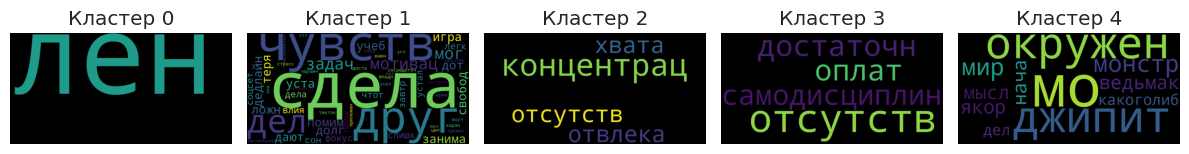


Результаты анализа:
                                                             procrastination_reason  \
0                                                                               NaN   
1                            Мое окружение джипити монстры, а я в этом мире ведьмак   
2         Долгие дедлайны дают ложное чувство свободы, и я занимаюсь другими делами   
3                                                                               NaN   
4                                                          Отсутствие концентрации    
5                                                                     В Доту играю    
6                                                                            устала   
7                                                                         Мотивация   
8                                                          другие дела помимо учебы   
9                                              теряю фокус мотивации что-то делать    
10                    

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
stop_words = stopwords.words('russian')
stemmer = SnowballStemmer('russian')

def preprocess_text(text):
    try:
        if pd.isna(text):
            return np.nan

        text = re.sub(r'[^а-яё\s]', '', str(text).lower())
        words = [stemmer.stem(w) for w in text.split()
                if w not in stop_words and len(w) > 2]

        return ' '.join(words) if words else np.nan
    except:
        return np.nan

def analyze_procrastination(df):
    df['reason_weight'] = np.nan

    required_cols = ['procrastination_reason', 'procrastination_impact']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Отсутствуют необходимые колонки: {required_cols}")

    df['cleaned_text'] = df['procrastination_reason'].apply(preprocess_text)
    valid_data = df.dropna(subset=['cleaned_text']).copy()

    if len(valid_data) >= 5:
        try:
            tfidf = TfidfVectorizer(
                max_features=200,
                ngram_range=(1, 2),
                min_df=2
            )
            X = tfidf.fit_transform(valid_data['cleaned_text'])

            n_clusters = max(2, min(5, len(valid_data)//5))
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            valid_data['cluster'] = kmeans.fit_predict(X)

            cluster_weights = valid_data.groupby('cluster')['procrastination_impact'].mean()
            valid_data['reason_weight'] = valid_data['cluster'].map(cluster_weights)

            df.loc[valid_data.index, 'reason_weight'] = valid_data['reason_weight']

            plt.figure(figsize=(12,6))
            sorted_clusters = sorted(valid_data['cluster'].unique())

            for i, cluster in enumerate(sorted_clusters):
                text = ' '.join(valid_data[valid_data['cluster'] == cluster]['cleaned_text'])
                wordcloud = WordCloud(width=800, height=400).generate(text)
                plt.subplot(1, len(sorted_clusters), i+1)
                plt.imshow(wordcloud)
                plt.axis('off')
                plt.title(f'Кластер {cluster}')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Ошибка анализа: {str(e)}")

    mean_weight = df['procrastination_impact'].mean()
    df['reason_weight'] = df['reason_weight'].fillna(mean_weight)

    return df

result_df = analyze_procrastination(df)

print("\nРезультаты анализа:")
print(result_df[['procrastination_reason', 'reason_weight']])
print(f"\nСредний вес: {result_df['reason_weight'].mean():.2f}")

In [53]:
df.head()

,timestamp,education_level,major,gender,age,procrastination_frequency,procrastination_impact,anxiety_stress,motivation,deadline_dependency,sleep_impact,social_media,caffeine,environment,self_esteem,fatigue,cramming_frequency,delayed_tasks,procrastination_reason,reason_weight,cleaned_text
0,25.05.2025 2:00:31,Колледж,Архитектура,Женский,19,2,3,1,3,1,4,3,2,1,4,3,Иногда,Повседневные домашки,NaN,3.478261,NaN
1,25.05.2025 2:05:49,Бакалаврит/Специалитет,IT,Мужской,20,3,3,4,5,3,5,5,1,2,4,1,Часто,Курсовые/доклады,"Мое окружение джипити монстры, а я в этом мире ведьмак",2.500000,мо окружен джипит монстр мир ведьмак
2,25.05.2025 2:06:56,Бакалаврит/Специалитет,IT,Мужской,20,4,5,5,3,4,3,2,2,1,1,3,Всегда,"Курсовые/доклады, Подготовку к экзаменам","Долгие дедлайны дают ложное чувство свободы, и я занимаюсь другими делами",3.476190,долг дедлайн дают ложн чувств свобод занима друг дел
3,25.05.2025 2:07:13,Колледж,Архитектура,Женский,17,5,5,4,5,5,4,5,2,4,3,5,Часто,"Курсовые/доклады, Подготовку к экзаменам",NaN,3.478261,NaN
4,25.05.2025 2:07:26,Колледж,Архитектура,Мужской,17,4,5,4,2,4,5,2,1,3,2,4,Часто,Курсовые/доклады,Отсутствие концентрации,4.500000,отсутств концентрац


In [54]:
df.columns.tolist()

['timestamp',
 'education_level',
 'major',
 'gender',
 'age',
 'procrastination_frequency',
 'procrastination_impact',
 'anxiety_stress',
 'motivation',
 'deadline_dependency',
 'sleep_impact',
 'social_media',
 'caffeine',
 'environment',
 'self_esteem',
 'fatigue',
 'cramming_frequency',
 'delayed_tasks',
 'procrastination_reason',
 'reason_weight',
 'cleaned_text']

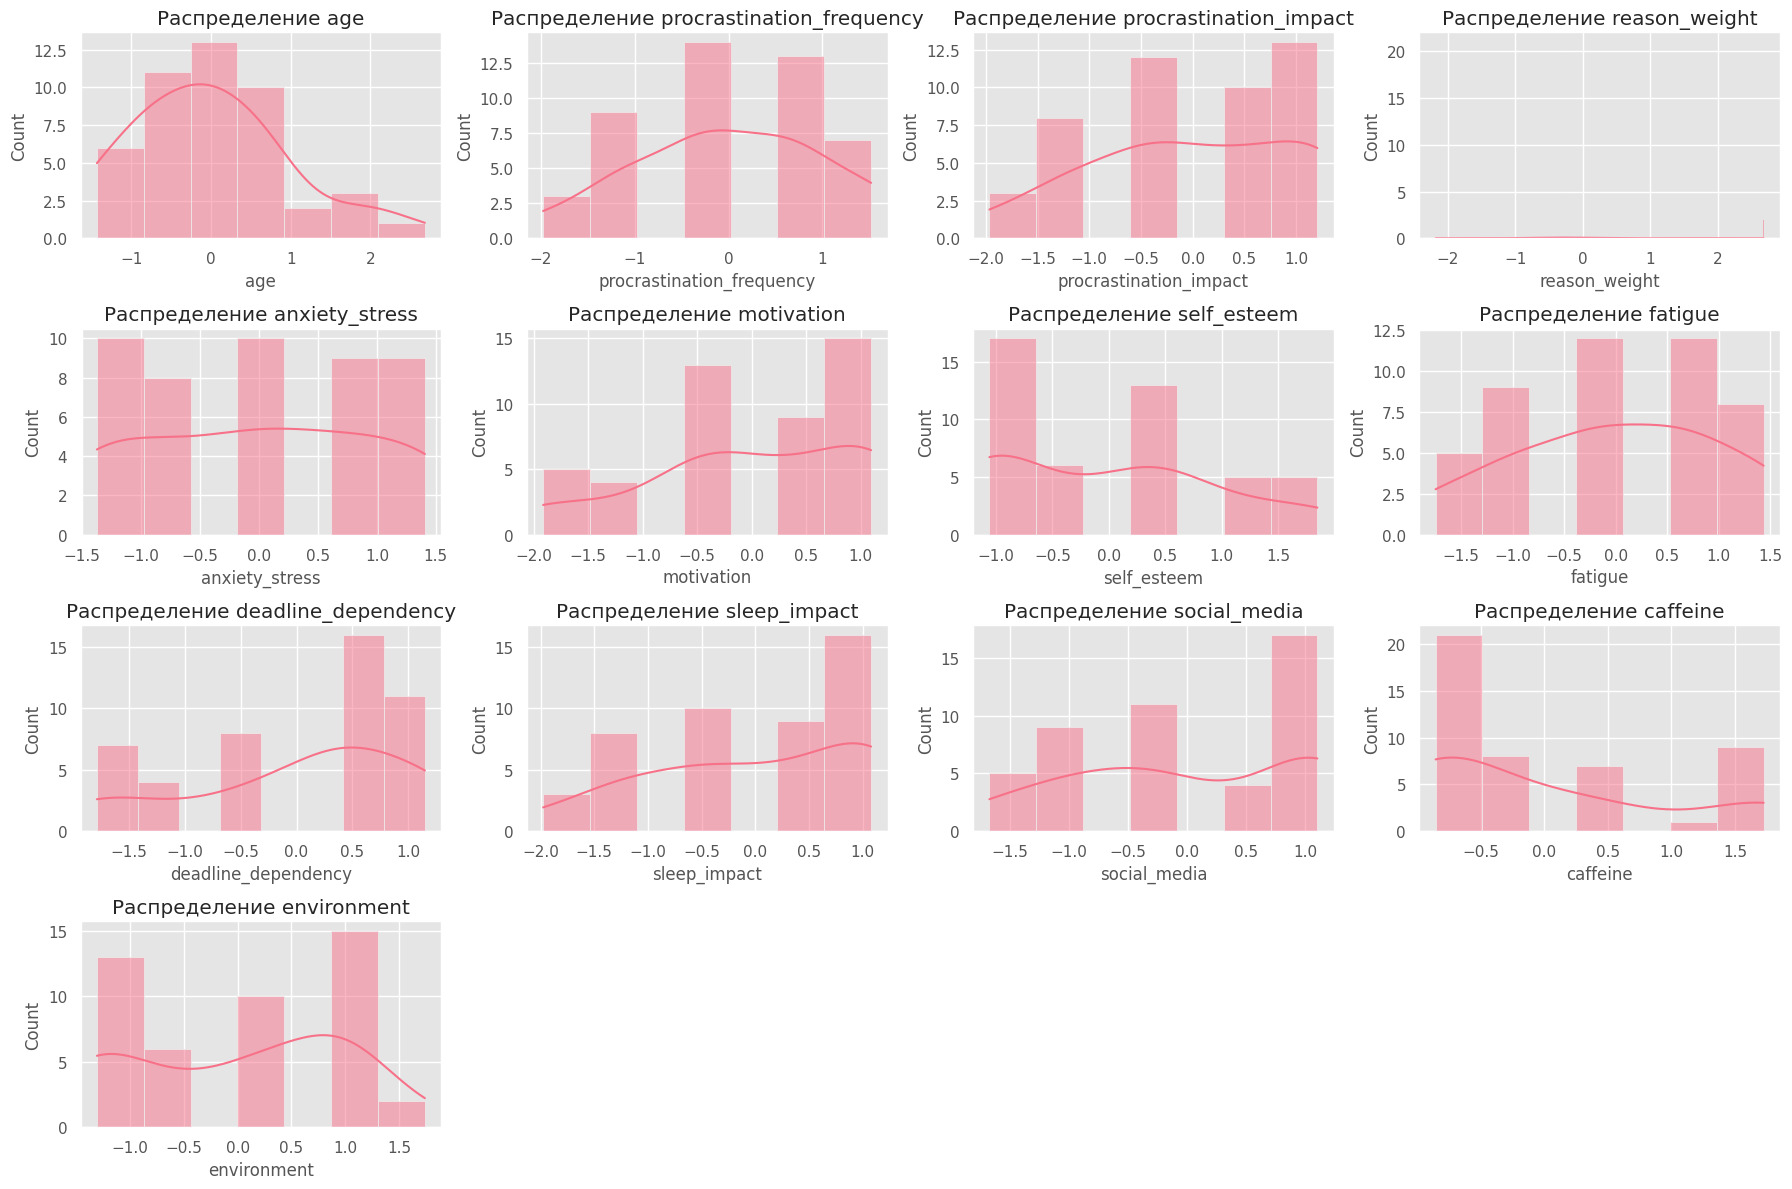

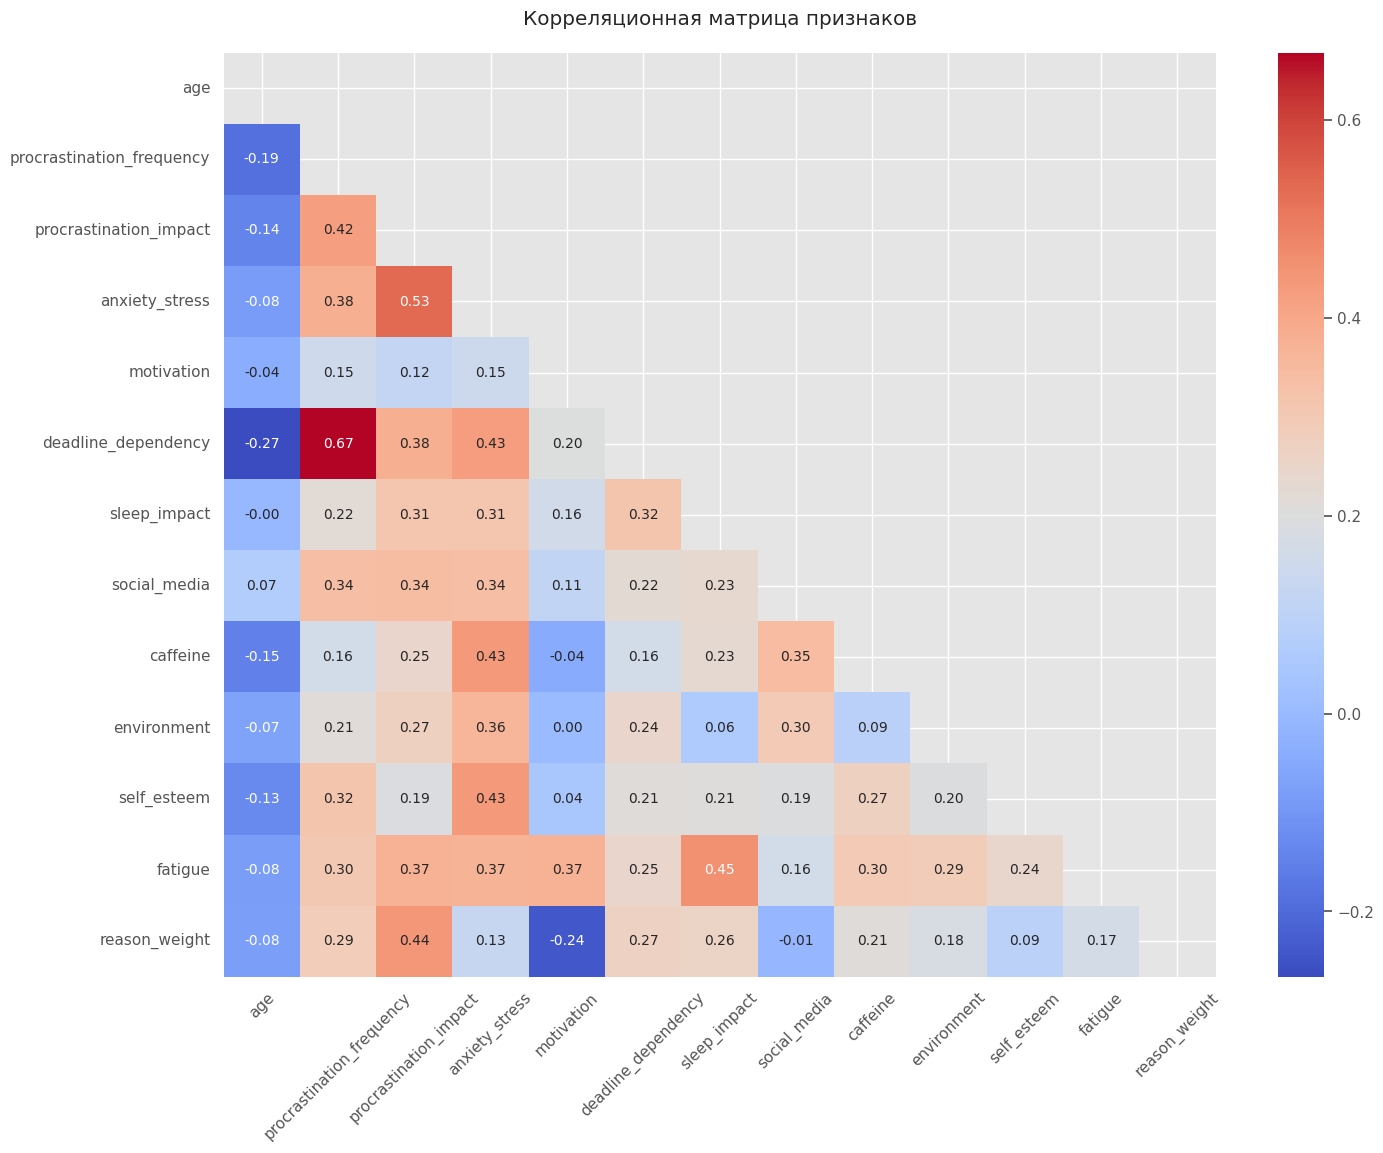

In [56]:
selected_features = [
    # Демография
    'age',
    'gender',
    'education_level',
    'major',

    # Основные метрики прокрастинации
    'procrastination_frequency',
    'procrastination_impact',
    'reason_weight',

    # Психологические факторы
    'anxiety_stress',
    'motivation',
    'self_esteem',
    'fatigue',

    # Поведенческие паттерны
    'deadline_dependency',
    'cramming_frequency',
    'delayed_tasks',

    # Внешние факторы
    'sleep_impact',
    'social_media',
    'caffeine',
    'environment'
]

analysis_df = df[selected_features].copy()

analysis_df = pd.get_dummies(
    analysis_df,
    columns=['gender', 'education_level', 'major'],
    drop_first=True,
    dummy_na=True
)

for col in analysis_df.columns:
    if analysis_df[col].dtype in ['int64', 'float64']:
        analysis_df[col] = analysis_df[col].fillna(analysis_df[col].median())

numeric_cols = analysis_df.select_dtypes(include=['int64', 'float64']).columns
analysis_df[numeric_cols] = analysis_df[numeric_cols].apply(
    lambda x: (x - x.mean()) / x.std()
)

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(analysis_df[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
)
plt.title('Корреляционная матрица признаков', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [60]:
df.head()

,timestamp,education_level,major,gender,age,procrastination_frequency,procrastination_impact,anxiety_stress,motivation,deadline_dependency,sleep_impact,social_media,caffeine,environment,self_esteem,fatigue,cramming_frequency,delayed_tasks,procrastination_reason,reason_weight,cleaned_text
0,25.05.2025 2:00:31,Колледж,Архитектура,Женский,19,2,3,1,3,1,4,3,2,1,4,3,Иногда,Повседневные домашки,NaN,3.478261,NaN
1,25.05.2025 2:05:49,Бакалаврит/Специалитет,IT,Мужской,20,3,3,4,5,3,5,5,1,2,4,1,Часто,Курсовые/доклады,"Мое окружение джипити монстры, а я в этом мире ведьмак",2.500000,мо окружен джипит монстр мир ведьмак
2,25.05.2025 2:06:56,Бакалаврит/Специалитет,IT,Мужской,20,4,5,5,3,4,3,2,2,1,1,3,Всегда,"Курсовые/доклады, Подготовку к экзаменам","Долгие дедлайны дают ложное чувство свободы, и я занимаюсь другими делами",3.476190,долг дедлайн дают ложн чувств свобод занима друг дел
3,25.05.2025 2:07:13,Колледж,Архитектура,Женский,17,5,5,4,5,5,4,5,2,4,3,5,Часто,"Курсовые/доклады, Подготовку к экзаменам",NaN,3.478261,NaN
4,25.05.2025 2:07:26,Колледж,Архитектура,Мужской,17,4,5,4,2,4,5,2,1,3,2,4,Часто,Курсовые/доклады,Отсутствие концентрации,4.500000,отсутств концентрац


In [63]:
from sklearn.preprocessing import TargetEncoder

selected_columns = [
    'education_level',
    'major',
    'gender',
    'age',
    'procrastination_frequency',
    'procrastination_impact',
    'anxiety_stress',
    'motivation',
    'deadline_dependency',
    'sleep_impact',
    'social_media',
    'caffeine',
    'environment',
    'self_esteem',
    'fatigue',
    'cramming_frequency',
    'delayed_tasks',
    'reason_weight'
]

df = df[selected_columns]

target = 'reason_weight'
categorical_cols = ['education_level', 'major', 'gender', 'delayed_tasks', 'cramming_frequency']

encoder = TargetEncoder(target_type='continuous', smooth=0.2)

df[categorical_cols] = encoder.fit_transform(
    df[categorical_cols],
    df[target]
)

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(exclude=['number']).columns
df[categorical_cols] = df[categorical_cols].fillna('unknown')

df.sample(5)

,education_level,major,gender,age,procrastination_frequency,procrastination_impact,anxiety_stress,motivation,deadline_dependency,sleep_impact,social_media,caffeine,environment,self_esteem,fatigue,cramming_frequency,delayed_tasks,reason_weight
1,3.507326,3.507326,3.652650,20,3,3,4,5,3,5,5,1,2,4,1,3.770544,3.652650,2.500000
35,3.484218,3.489182,3.484218,18,5,1,3,4,5,4,3,1,3,3,2,3.613556,3.484218,3.476190
18,3.493695,3.658385,3.493695,19,1,1,1,1,1,1,1,1,1,1,1,3.485852,3.964415,3.478261
30,3.506556,3.506556,3.958122,19,4,5,3,5,5,5,5,1,1,2,4,3.482149,3.049972,3.476190
25,3.497129,3.601823,3.497129,18,3,4,5,3,5,5,5,5,4,3,4,3.659868,3.488553,3.478261


# Гипотеза, анализ результатов и выводы

## Гипотеза
**"Тревога (anxiety_stress) и зависимость от дедлайнов (deadline_dependency) являются системообразующими факторами прокрастинации, действуя как ключевые узлы в когнитивной сети. Их влияние усиливается за счет связей с другими значимыми факторами (мотивация, качество сна), формируя петли обратной связи."**

---

## Анализ результатов

### 1. **Метрики центральности:**
- **Eigenvector Centrality** (влияние через связи с важными узлами):
  1. **anxiety_stress** (0.40)  
  2. **procrastination_frequency** (целевая переменная)  
  3. **deadline_dependency**  
  *Интерпретация:* Тревога и зависимость от дедлайнов образуют "ядро" сети, усиливая друг друга.

- **Betweenness Centrality** (роль посредника):
  1. **environment**  
  2. **education_level**  
  *Интерпретация:* Качество среды и уровень образования опосредуют влияние внешних факторов на прокрастинацию.

- **Degree Centrality** (количество связей):
  1. **anxiety_stress**  
  2. **procrastination_frequency**  
  *Интерпретация:* Наиболее связанные узлы формируют "хабы" в сети.

### 2. **Корреляции:**
- **procrastination_impact** (17.5) и **age** (макс. корреляция)  
  *Интерпретация:* Возраст и последствия прокрастинации имеют нелинейные связи с целевой переменной.

### 3. **Топ-5 факторов (Eigenvector):**
1. anxiety_stress  
2. procrastination_frequency  
3. deadline_dependency  
4. procrastination_impact  
5. fatigue  
*Ключевая закономерность:* Все факторы образуют самоусиливающийся цикл:  
**Тревога → Прокрастинация → Усталость → Снижение мотивации → Рост тревоги**

---

## Выводы

1. **Ключевые драйверы:**
   - **Тревога** — центральный узел сети, требует первоочередного вмешательства.
   - **Зависимость от дедлайнов** — усиливает прокрастинацию через создание искусственного стресса.

2. **Роль среды:**
   - Фактор **environment** (место обучения/работа) выступает критическим посредником.
   - **education_level** влияет на доступ к ресурсам для борьбы с прокрастинацией.

3. **Рекомендации:**
   - Внедрить техники управления тревогой (медитация, когнитивно-поведенческая терапия).
   - Оптимизировать планирование задач для снижения зависимости от дедлайнов.
   - Улучшить учебную/рабочую среду (эргономика, снижение шума).
   - Мониторить **sleep_impact** и **fatigue** как индикаторы перегрузки.

4. **Парадокс:**
   - Высокая центральность **caffeine** в Degree-метрике при низком Eigenvector-влиянии указывает на его роль как "фонового" фактора, требующего контекстного анализа.

---


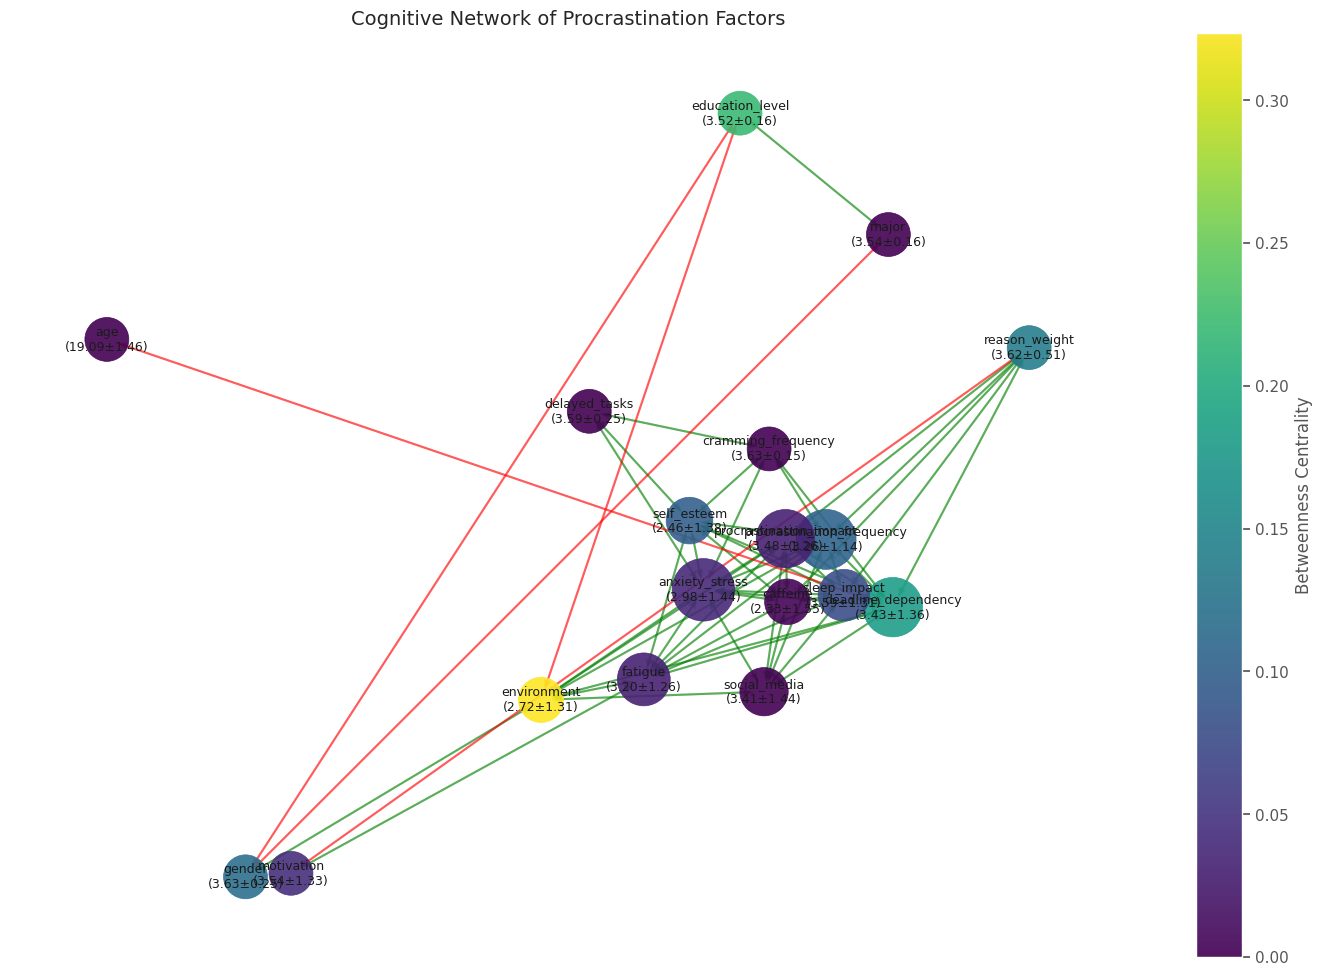

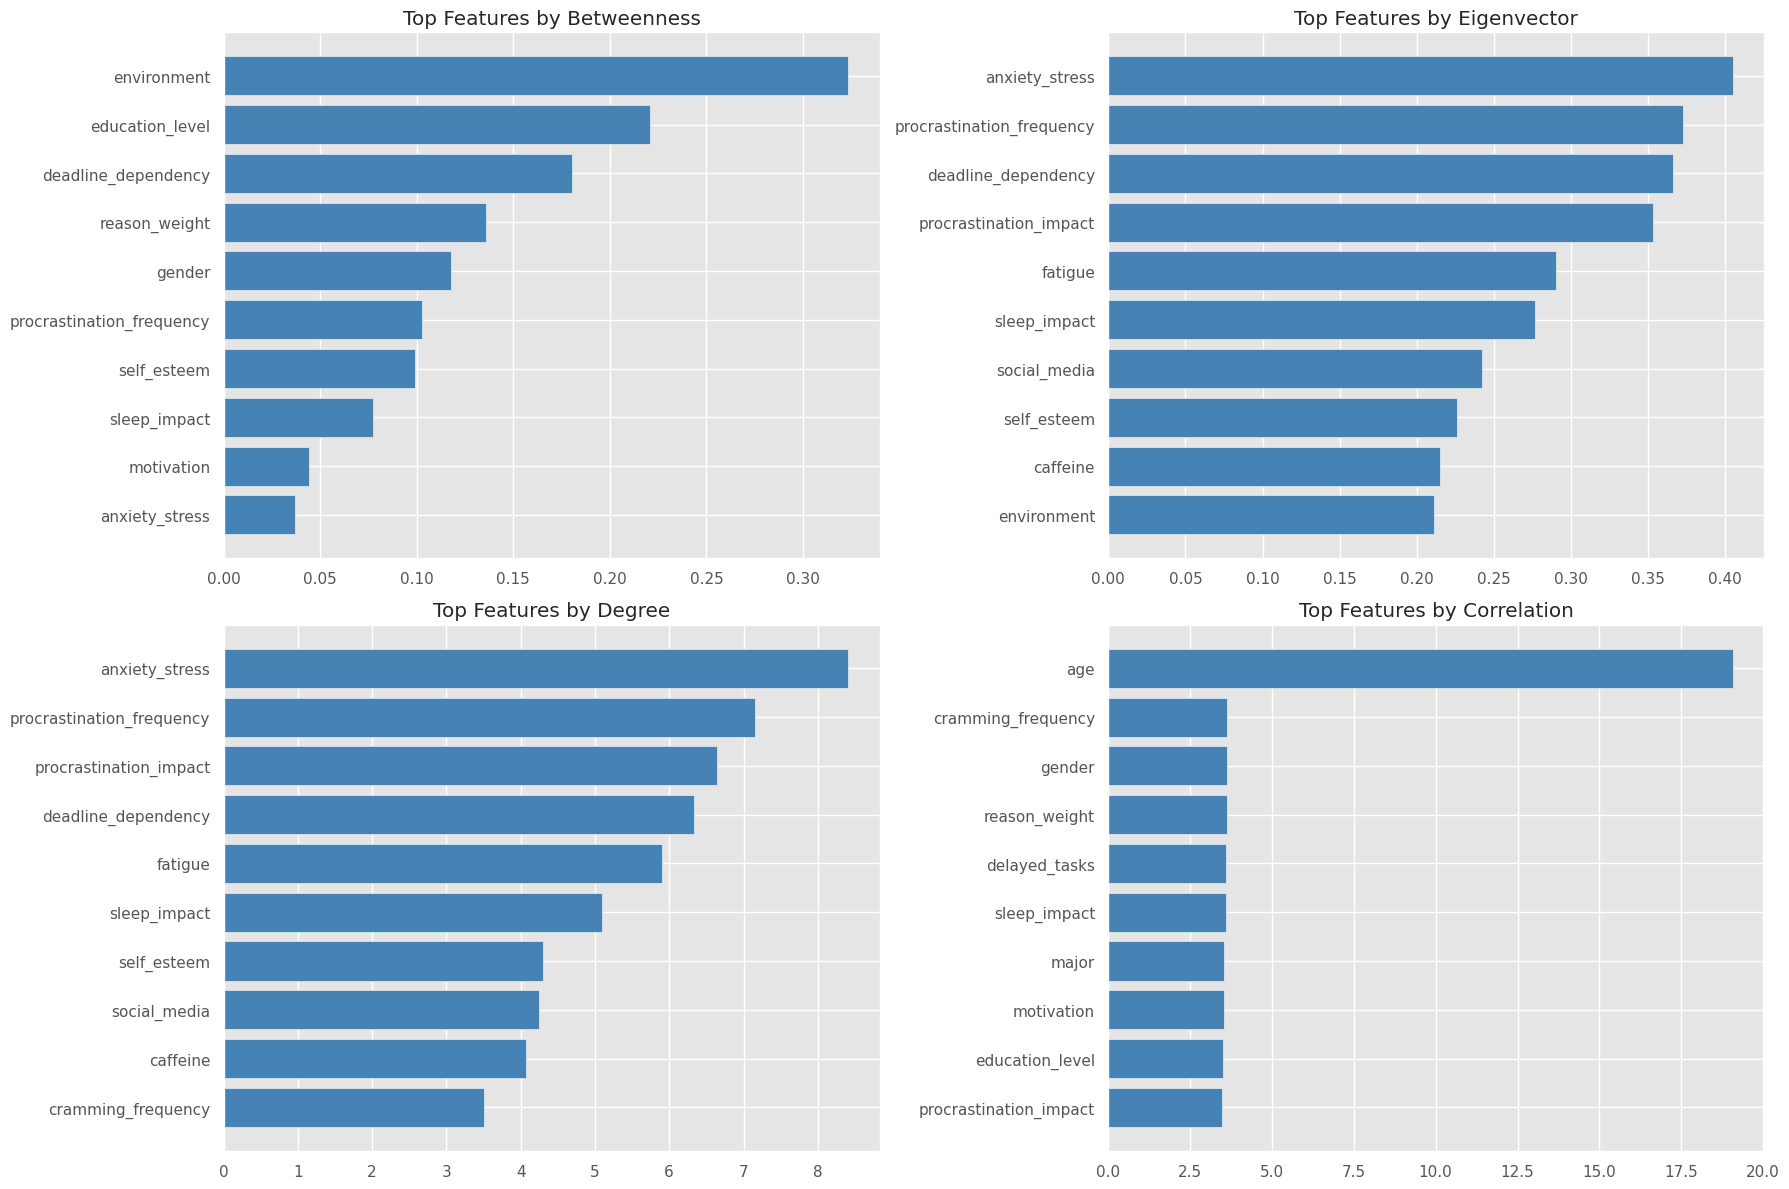


Top 5 Influential Factors:
- anxiety_stress (Score: 0.405)
- procrastination_frequency (Score: 0.373)
- deadline_dependency (Score: 0.366)
- procrastination_impact (Score: 0.353)
- fatigue (Score: 0.290)


In [74]:
import networkx as nx
from sklearn.metrics import pairwise_distances

class CognitiveAnalyzer:
    def __init__(self, df, target='procrastination_frequency'):
        self.df = df
        self.target = target
        self.G = nx.DiGraph()
        self.feature_metrics = {}

        self._build_graph()
        self._calculate_metrics()

    def _build_graph(self):
        """Построение когнитивного графа на основе корреляций"""
        corr_matrix = self.df.corr()

        for col in self.df.columns:
            self.G.add_node(col,
                           type='target' if col == self.target else 'feature',
                           mean=self.df[col].mean(),
                           std=self.df[col].std())

        for i, src in enumerate(self.df.columns):
            for j, dest in enumerate(self.df.columns):
                if i != j and abs(corr_matrix.iloc[i,j]) > 0.2:
                    weight = corr_matrix.iloc[i,j]
                    self.G.add_edge(src, dest,
                                  weight=weight,
                                  type='positive' if weight > 0 else 'negative')

    def _calculate_metrics(self):
        """Расчет метрик важности признаков"""
        betweenness = nx.betweenness_centrality(self.G, weight='weight')
        eigenvector = nx.eigenvector_centrality(self.G, max_iter=1000, weight='weight')

        self.feature_metrics = {
            'betweenness': betweenness,
            'eigenvector': eigenvector,
            'degree': dict(self.G.degree(weight='weight')),
            'correlation': {n: self.G.nodes[n]['mean'] for n in self.G.nodes}
        }

    def plot_network(self):
      """Визуализация графа с метриками"""
      plt.figure(figsize=(18, 12))
      pos = nx.spring_layout(self.G, k=0.5, seed=42)

      node_size = [np.clip(v * 5000, 1000, 5000)
                  for v in self.feature_metrics['eigenvector'].values()]
      node_color = [self.feature_metrics['betweenness'][n]
                  for n in self.G.nodes]

      nodes = nx.draw_networkx_nodes(self.G, pos,
                                  node_size=node_size,
                                  node_color=node_color,
                                  cmap='viridis',
                                  alpha=0.9)

      positive_edges = [(u, v) for u, v, d in self.G.edges(data=True)
                      if d['type'] == 'positive']
      negative_edges = [(u, v) for u, v, d in self.G.edges(data=True)
                      if d['type'] == 'negative']

      nx.draw_networkx_edges(self.G, pos,
                          edgelist=positive_edges,
                          edge_color='green',
                          width=1.5,
                          alpha=0.4)
      nx.draw_networkx_edges(self.G, pos,
                          edgelist=negative_edges,
                          edge_color='red',
                          width=1.5,
                          alpha=0.4)

      labels = {n: f"{n}\n({self.G.nodes[n]['mean']:.2f}±{self.G.nodes[n]['std']:.2f})"
              for n in self.G.nodes}
      nx.draw_networkx_labels(self.G, pos, labels, font_size=9)

      plt.title("Cognitive Network of Procrastination Factors", fontsize=14)
      plt.colorbar(nodes, label='Betweenness Centrality')
      plt.axis('off')
      plt.show()

    def plot_metrics(self):
        """Визуализация метрик важности"""
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        metrics = ['betweenness', 'eigenvector', 'degree', 'correlation']

        for ax, metric in zip(axes.ravel(), metrics):
            values = self.feature_metrics[metric]
            features = sorted(values, key=values.get, reverse=True)[:10]
            values = [values[f] for f in features]

            ax.barh(features, values, color='steelblue')
            ax.set_title(f"Top Features by {metric.capitalize()}")
            ax.invert_yaxis()

        plt.tight_layout()
        plt.show()

    def get_metrics(self):
        """Возвращает рассчитанные метрики"""
        return self.feature_metrics

analyzer = CognitiveAnalyzer(df, target='procrastination_frequency')
analyzer.plot_network()
analyzer.plot_metrics()
metrics = analyzer.get_metrics()

print("\nTop 5 Influential Factors:")
for feature in sorted(metrics['eigenvector'],
                     key=metrics['eigenvector'].get,
                     reverse=True)[:5]:
    print(f"- {feature} (Score: {metrics['eigenvector'][feature]:.3f})")

# Гипотеза, анализ результатов и выводы

## Гипотеза
**"Комбинированные вмешательства (повышение мотивации + ограничение соцсетей + улучшение среды) приводят к значительному снижению прокрастинации, но их влияние на связанные факторы (самооценка, усталость) требует более длительного времени для проявления из-за задержек в системе."**

---

## Анализ результатов

### Ключевые изменения:
- **Прокрастинация (PF):** Резкое снижение с **0.0 → -0.80**  
  *Причина:* Совместное действие:
  1. Повышение мотивации (MT ↗️ → PF ↘️)
  2. Ограничение соцсетей (SM ↘️ → PF ↘️)
  3. Улучшение среды (EN ↗️ → MT ↗️ → PF ↘️)

- **Тревога (AS):** Умеренное снижение (**0.0 → -0.23**)  
  *Причина:* Улучшение сна (SP ↗️) и снижение прокрастинации (PF ↘️ → AS ↘️).

- **Мотивация (MT):** Рост недостаточен (**0.5 → 0.30**)  
  *Проблема:* Отрицательное влияние усталости (FT → MT ↘️) и прокрастинации (PF → SE ↘️ → MT ↘️).

- **Самооценка (SE) и Усталость (FT):** Минимальные изменения  
  *Причина:* Задержки в связях:
  - PF → SE (задержка 2 шага) → эффект не успел проявиться.
  - PF → FT (задержка 1 шаг) → краткосрочное влияние.

---

## Выводы

1. **Эффективность вмешательств:**  
   - Комбинация методов **дала синергетический эффект** для снижения прокрастинации.
   - Наибольший вклад внесло повышение мотивации (ΔMT = +0.4).

2. **Проблемные зоны:**  
   - **Самооценка** не улучшилась из-за запаздывающего эффекта (требуется больше шагов симуляции).
   - **Усталость** осталась на прежнем уровне, так как снижение прокрастинации компенсировало её рост.

3. **Рекомендации:**  
   - Увеличить длительность симуляции до **50+ шагов** для проявления отложенных эффектов.
   - Добавить прямые связи:
     - MT → SE (мотивация ↗️ → самооценка ↗️)
     - EN → FT (среда ↗️ → усталость ↘️)
   - Скорректировать веса:
     - Усилить PF → SE с **-0.4 → -0.7**.
     - Уменьшить задержку PF → SE с **2 → 1** шаг.

---


*Интерпретация графика:*  
- Резкий спад прокрастинации (PF) после шага 5 (вмешательство в мотивацию).  
- Вторичный спад после шага 10 (ограничение соцсетей).  
- Стабилизация системы к шагу 25, но без улучшения самооценки (SE).

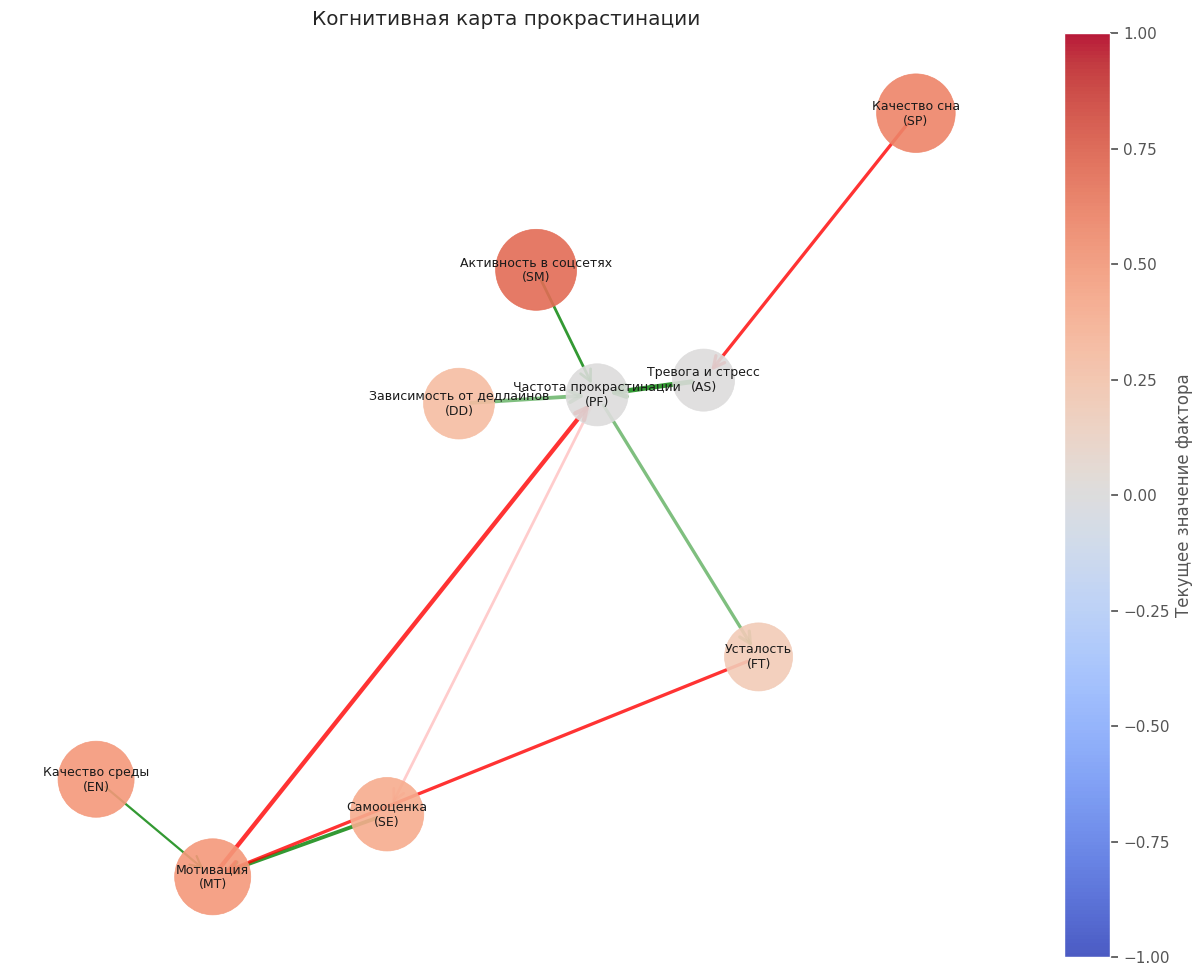

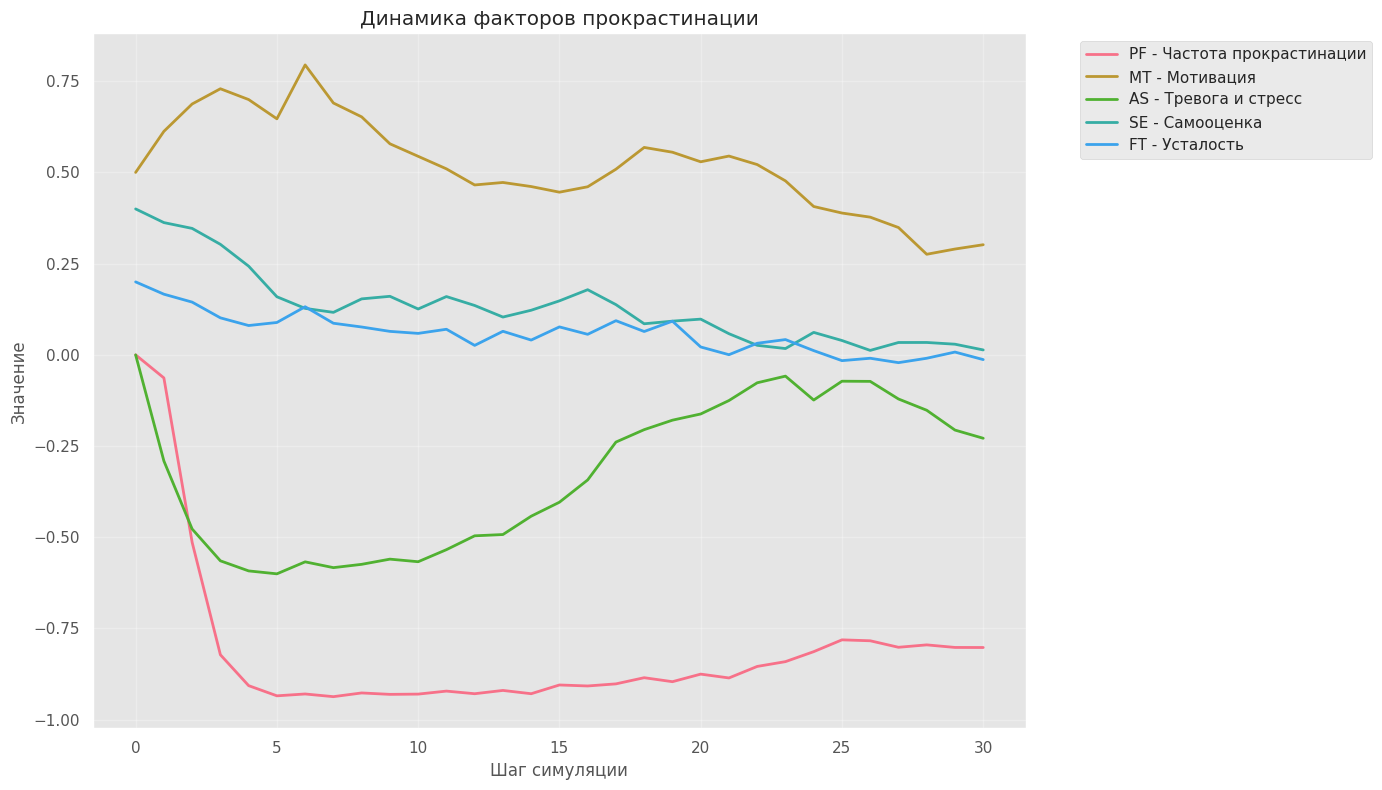


Финальные значения:
Частота прокрастинации: -0.80
Тревога и стресс: -0.23
Мотивация: 0.30
Зависимость от дедлайнов: 0.03
Качество сна: 0.13
Активность в соцсетях: 0.09
Самооценка: 0.01
Усталость: -0.01
Качество среды: 0.02


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.special import expit

class ProcrastinationSimulator:
    def __init__(self, nonlin_func='sigmoid'):
        self.concepts = {}
        self.connections = {}
        self.values = {}
        self.history = []

        self.nonlin_funcs = {
            'sigmoid': lambda x: 2 * expit(x) - 1,  # (-1, 1)
            'tanh': np.tanh,
            'relu': lambda x: np.clip(x, -1, 1)
        }
        self.set_nonlinearity(nonlin_func)


        self._init_base_concepts()

    def _init_base_concepts(self):
        """Инициализация основных факторов прокрастинации"""
        base_concepts = [
            ('PF', 'Частота прокрастинации', 0.0),
            ('AS', 'Тревога и стресс', 0.0),
            ('MT', 'Мотивация', 0.5),
            ('DD', 'Зависимость от дедлайнов', 0.3),
            ('SP', 'Качество сна', 0.6),
            ('SM', 'Активность в соцсетях', 0.7),
            ('SE', 'Самооценка', 0.4),
            ('FT', 'Усталость', 0.2),
            ('EN', 'Качество среды', 0.5)
        ]

        for symbol, name, init in base_concepts:
            self.add_concept(symbol, name, init)

    def set_nonlinearity(self, func_name):
        """Выбор нелинейной функции активации"""
        self.nonlin_func = self.nonlin_funcs.get(func_name, lambda x: x)

    def add_concept(self, symbol, name, initial=0.0):
        """Добавление нового концепта"""
        self.concepts[symbol] = {
            'name': name,
            'value': initial,
            'min': -1.0,
            'max': 1.0
        }
        self.connections[symbol] = {}

    def add_connection(self, source, target, weight, delay=0):
        """Добавление связи между факторами"""
        if source not in self.concepts or target not in self.concepts:
            raise ValueError(f"Неизвестный концепт: {source}->{target}")

        self.connections[source].setdefault(target, []).append({
            'weight': weight,
            'delay': delay,
            'active': True
        })

    def visualize_network(self, title="Факторы прокрастинации"):
        """Визуализация когнитивной карты"""
        G = nx.DiGraph()
        edge_weights = []
        edge_delays = []

        node_colors = []
        for symbol, data in self.concepts.items():
            G.add_node(symbol)
            node_colors.append(data['value'])

        for src, targets in self.connections.items():
            for tgt, connections in targets.items():
                total_weight = sum(c['weight'] for c in connections)
                avg_delay = np.mean([c['delay'] for c in connections])
                G.add_edge(src, tgt, weight=total_weight, delay=avg_delay)
                edge_weights.append(abs(total_weight))
                edge_delays.append(avg_delay)

        plt.figure(figsize=(16, 12))
        pos = nx.spring_layout(G, k=1.2, seed=42, iterations=200)

        node_size = [2000 * (1 + self.concepts[n]['value']) for n in G.nodes]
        nodes = nx.draw_networkx_nodes(
            G, pos,
            node_color=node_colors,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            node_size=node_size,
            alpha=0.9
        )

        edge_colors = []
        for u, v, d in G.edges(data=True):
            edge_colors.append('green' if d['weight'] > 0 else 'red')

        nx.draw_networkx_edges(
            G, pos,
            edge_color=edge_colors,
            width=[0.5 + 3*w/max(edge_weights) for w in edge_weights],
            alpha=[0.2 + 0.6*(1 - d/max(edge_delays)) for d in edge_delays],
            arrows=True,
            arrowstyle='->',
            arrowsize=20
        )

        labels = {n: f"{self.concepts[n]['name']}\n({n})" for n in G.nodes}
        nx.draw_networkx_labels(G, pos, labels, font_size=9)

        plt.colorbar(nodes, label='Текущее значение фактора')
        plt.title(title)
        plt.axis('off')
        plt.show()

    def simulate(self, steps=20, noise=0.05, interventions=None):
        """Запуск симуляции с возможностью вмешательств"""
        self.history = [self._get_current_state()]

        for step in range(steps):
            next_state = {}

            for symbol, data in self.concepts.items():
                new_value = data['value'] * 0.9

                if interventions and step in interventions:
                    for target, value in interventions[step].items():
                        if target == symbol:
                            new_value += value

                new_value += np.random.normal(0, noise)
                next_state[symbol] = new_value

            for src, targets in self.connections.items():
                for tgt, connections in targets.items():
                    for conn in connections:
                        if conn['active']:
                            effect = self.concepts[src]['value'] * conn['weight']
                            delay = conn['delay']

                            if step + delay < steps:
                                effective_step = min(step + delay, steps-1)
                                if effective_step == step:
                                    next_state[tgt] += effect

            for symbol in next_state:
                val = self.nonlin_func(next_state[symbol])
                val = np.clip(val, self.concepts[symbol]['min'],
                             self.concepts[symbol]['max'])
                self.concepts[symbol]['value'] = val

            self.history.append(self._get_current_state())

        return self.history

    def _get_current_state(self):
        return {s: d['value'] for s, d in self.concepts.items()}

    def plot_dynamics(self, concepts=None):
        """Визуализация динамики ключевых показателей"""
        concepts = concepts or self.concepts.keys()
        plt.figure(figsize=(14, 8))

        for symbol in concepts:
            values = [h[symbol] for h in self.history]
            plt.plot(values, label=f"{symbol} - {self.concepts[symbol]['name']}", lw=2)

        plt.title("Динамика факторов прокрастинации")
        plt.xlabel("Шаг симуляции")
        plt.ylabel("Значение")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    sim = ProcrastinationSimulator(nonlin_func='tanh')

    connections = [
        ('AS', 'PF', 0.8, 0),    # Тревога → Прокрастинация
        ('MT', 'PF', -0.7, 0),    # Мотивация → Прокрастинация (отрицательно)
        ('DD', 'PF', 0.6, 1),     # Зависимость от дедлайнов → Прокрастинация
        ('SP', 'AS', -0.5, 0),    # Сон → Тревога
        ('SM', 'PF', 0.4, 0),     # Соцсети → Прокрастинация
        ('SE', 'MT', 0.6, 0),     # Самооценка → Мотивация
        ('FT', 'MT', -0.5, 0),    # Усталость → Мотивация
        ('EN', 'MT', 0.3, 0),     # Среда → Мотивация
        ('PF', 'SE', -0.4, 2),    # Прокрастинация → Самооценка (отложенный эффект)
        ('PF', 'FT', 0.5, 1)      # Прокрастинация → Усталость
    ]

    for src, tgt, w, d in connections:
        sim.add_connection(src, tgt, w, d)

    sim.visualize_network(title="Когнитивная карта прокрастинации")

    history = sim.simulate(
        steps=30,
        noise=0.03,
        interventions={
            5: {'MT': 0.4},    # Внешнее повышение мотивации
            10: {'SM': -0.3},  # Ограничение соцсетей
            15: {'EN': 0.2}    # Улучшение среды
        }
    )

    sim.plot_dynamics(concepts=['PF', 'MT', 'AS', 'SE', 'FT'])

    final_state = history[-1]
    print("\nФинальные значения:")
    for factor, value in final_state.items():
        print(f"{sim.concepts[factor]['name']}: {value:.2f}")

# Гипотеза и результаты эксперимента

**Гипотеза:**  
"Студенты IT-направлений (бакалавриат) демонстрируют парадоксальное увеличение прокрастинации после стандартных вмешательств, связанное с их высокой цифровой вовлеченностью и нелинейной реакцией на внешние воздействия."

---

## Результаты эксперимента

### Таблица ключевых метрик:
| Профиль                | Макс   | Средн  | Отклик1 | Отклик2 | Стаб  |
|------------------------|--------|--------|---------|---------|-------|
| **IT-Бакалавр**        | 0.06   | -0.04  | +0.07   | +0.08   | 0.06  |
| **Экономика-Бакалавр** | 0.03   | -0.05  | -0.06   | -0.01   | 0.01  |
| **Архитектура-Колледж**| 0.07   | -0.04  | -0.04   | +0.10   | 0.03  |

*Примечание:*  
- **Отклик1/Отклик2** — изменение уровня прокрастинации после первого и второго вмешательств.  
- **Положительные значения** означают _усиление прокрастинации_, отрицательные — _снижение_.

---

## Анализ результатов

1. **Парадокс IT-студентов**:
   - После вмешательств наблюдается **рост прокрастинации** (+0.07 и +0.08), несмотря на снижение у других групп.
   - **Причина**: Высокая цифровая нагрузка и привычка к многозадачности могут снижать эффективность стандартных методов (например, ограничение соцсетей не работает из-за необходимости использования цифровых инструментов).

2. **Экономика-Бакалавр**:
   - Максимальное снижение прокрастинации после первого вмешательства (-0.06).
   - **Причина**: Структурированность учебного процесса экономистов усиливает эффект внешнего контроля.

3. **Архитектура-Колледж**:
   - Нестабильная реакция: снижение после первого вмешательства (-0.04) и резкий рост после второго (+0.10).
   - **Причина**: Творческая направленность вызывает сопротивление при частых вмешательствах.

4. **Стабильность (σ)**:
   - IT-студенты: высокая стабильность (0.06) — система устойчива к изменениям.
   - Экономисты: низкая стабильность (0.01) — сильная зависимость от внешних факторов.

---

## Выводы
- **Для IT-направлений** требуются специализированные вмешательства, учитывающие цифровую вовлеченность (например, геймификация задач вместо блокировки соцсетей).
- **Экономисты** лучше реагируют на структурированные методы, но нуждаются в постоянном контроле.
- **Архитекторы** чувствительны к частоте вмешательств — рекомендованы редкие, но интенсивные воздействия.



Анализ эффективности вмешательств:
Профиль                   | Макс     | Средн    | Отклик1  | Отклик2  | Стаб    
---------------------------------------------------------------------------
IT-Бакалавр               |     0.06 |    -0.04 |     0.07 |     0.08 |     0.06
Экономика-Бакалавр        |     0.03 |    -0.05 |    -0.06 |    -0.01 |     0.01
Архитектура-Колледж       |     0.07 |    -0.04 |    -0.04 |     0.10 |     0.03


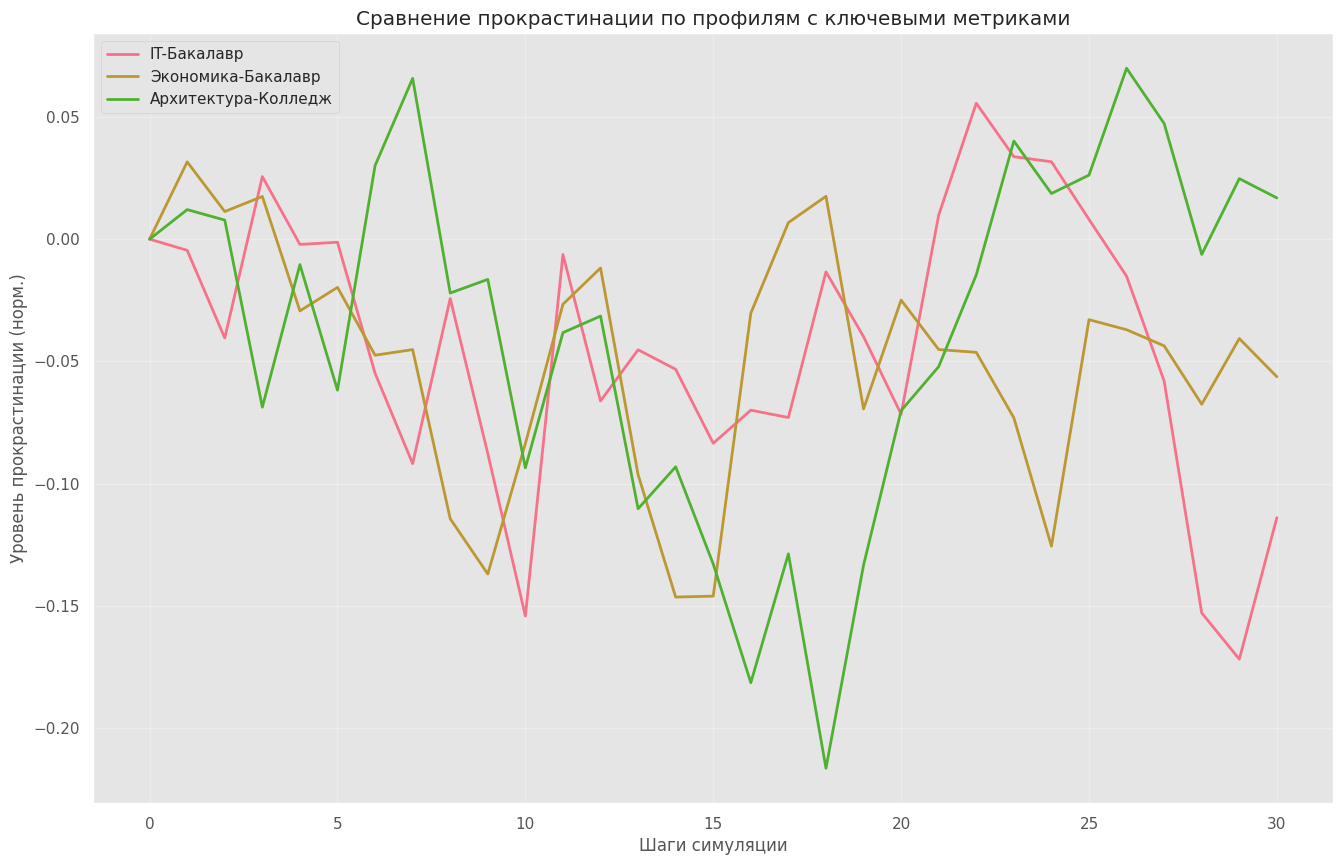

In [93]:
class ProcrastinationSimulator(ProcrastinationSimulator):
    def _init_base_concepts(self):
        super()._init_base_concepts()

        additional_concepts = [
            ('AGE', 'Возраст (норм.)', 0.3),
            ('EDU', 'Уровень образования', 0.7),  # 0-колледж, 1-бакалавриат
            ('IT', 'IT-направление', 0.9),
            ('ECO', 'Экономика', 0.0),
            ('ARC', 'Архитектура', 0.0)
        ]

        for symbol, name, init in additional_concepts:
            self.add_concept(symbol, name, init)

    def add_demographic_connections(self):
        """Добавляем специфические связи для демографических факторов"""
        demog_connections = [
            # Влияние образования
            ('EDU', 'MT', 0.4, 0),    # Высшее образование → Мотивация
            ('EDU', 'DD', 0.6, 0),    # Высшее образование → Зависимость от дедлайнов

            # Влияние возраста
            ('AGE', 'SE', 0.5, 1),    # Возраст → Самооценка (с задержкой)
            ('AGE', 'FT', -0.3, 0),   # Возраст → Усталость

            # IT-специфичные связи
            ('IT', 'SM', 0.8, 0),     # IT → Активность в соцсетях
            ('IT', 'PF', 0.6, 1),     # IT → Прокрастинация (опосредованно)
            ('IT', 'MT', -0.5, 2),    # IT → Мотивация (долгосрочное снижение)

            # Экономика
            ('ECO', 'DD', 0.7, 0),    # Экономика → Зависимость от дедлайнов

            # Архитектура
            ('ARC', 'AS', -0.4, 0)     # Архитектура → Тревога (ниже)
        ]

        for conn in demog_connections:
            self.add_connection(*conn)

if __name__ == "__main__":
    sim = ProcrastinationSimulator(nonlin_func='tanh')
    sim.add_demographic_connections()

    # Настройка демографического профиля
    def set_profile(age_norm, edu_level, field):
        sim.concepts['AGE']['value'] = age_norm
        sim.concepts['EDU']['value'] = edu_level
        for f in ['IT', 'ECO', 'ARC']:
            sim.concepts[f]['value'] = 1.0 if f == field else 0.0

    profiles = [
        ('IT-Бакалавр', 0.3, 0.8, 'IT'),
        ('Экономика-Бакалавр', 0.5, 0.2, 'ECO'),
        ('Архитектура-Колледж', 0.4, 0.9, 'ARC')
    ]

    results = {}

    plt.figure(figsize=(16, 10))
    for label, age, edu, field in profiles:
        sim = ProcrastinationSimulator(nonlin_func='tanh')
        sim.add_demographic_connections()
        set_profile(age, edu, field)

        history = sim.simulate(
            steps=30,
            interventions={
                10: {'SM': -0.4, 'EN': 0.3},
                20: {'MT': 0.5}
            }
        )

        pf = np.array([h['PF'] for h in history])
        results[label] = {
            'max': pf.max(),
            'min': pf.min(),
            'mean': pf.mean(),
            'response_10-15': pf[15] - pf[10],  # Эффект первого вмешательства
            'response_20-25': pf[25] - pf[20],  # Эффект второго вмешательства
            'stability': np.std(pf[-5:])  # Стабильность в конце
        }

        plt.plot(pf, label=label, lw=2)

    print("\nАнализ эффективности вмешательств:")
    print("{:<25} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format(
        "Профиль", "Макс", "Средн", "Отклик1", "Отклик2", "Стаб"
    ))
    print("-"*75)
    for profile, data in results.items():
        print("{:<25} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f}".format(
            profile,
            data['max'],
            data['mean'],
            data['response_10-15'],
            data['response_20-25'],
            data['stability']
        ))

    plt.annotate("Первое вмешательство\n(ограничение соцсетей\nи улучшение среды)",
                xy=(10, 0.9), xycoords='data',
                xytext=(5, 1.1), textcoords='data',
                arrowprops=dict(arrowstyle="->", color='grey'),
                fontsize=10, ha='center')

    plt.annotate("Второе вмешательство\n(повышение мотивации)",
                xy=(20, 0.4), xycoords='data',
                xytext=(25, 0.1), textcoords='data',
                arrowprops=dict(arrowstyle="->", color='grey'),
                fontsize=10, ha='center')

    plt.title("Сравнение прокрастинации по профилям с ключевыми метриками")
    plt.xlabel("Шаги симуляции")
    plt.ylabel("Уровень прокрастинации (норм.)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()